In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

exact_polytopes = True
folder_name = "m_3_r_2"
base_path = "data/"


def find_filename():
    i = 1
    while True:
        file_name = "run" + str(i)
        if not os.path.exists("./runs/" + file_name + ".csv"):
            return i-1
        i += 1
        

run_id = find_filename()
print("Run ID: ", run_id)

Run ID:  3


In [32]:
file_name = "/exact_politopes" if exact_polytopes else "/all_politopes"

x = np.load(base_path + folder_name + file_name + "_x.npy", allow_pickle=True)
y = np.load(base_path + folder_name + file_name+ "_y.npy", allow_pickle=True)

run = pd.read_csv("./runs/run" + str(run_id) + ".csv")


print("Mean: ", np.mean(y))
print("Std: ", np.std(y))
print("Std squared: ", np.mean(np.std(y)**2))

Mean:  870.952357851899
Std:  44418.43554794235
Std squared:  1972997416.5267084


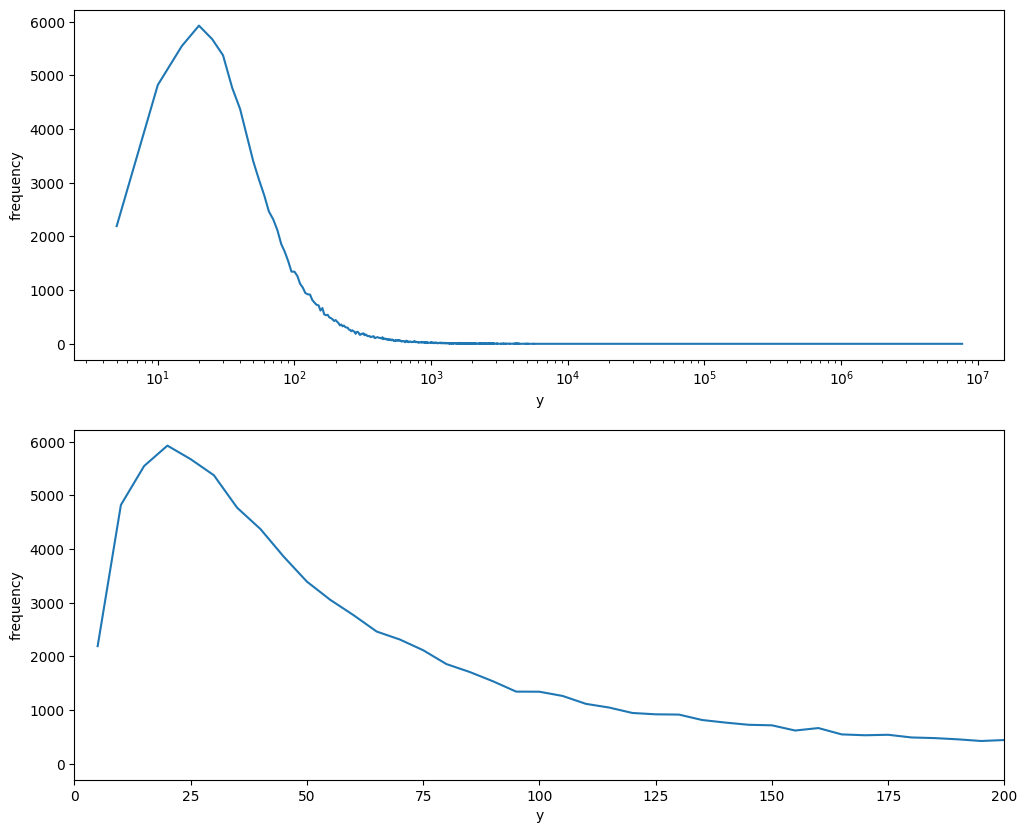

In [66]:
#Group y in values of 10
y_grouped = np.ceil(y/5)*5
#calculate the frequency of each group
y_grouped, frequency = np.unique(y_grouped, return_counts=True)

df_y_grouped = pd.DataFrame([y_grouped, frequency], index=["y", "frequency"]).T
df_y_grouped.to_csv("data/" + folder_name + "/y_grouped.csv")

figure2, ax2 = plt.subplots(2, 1, figsize=(12, 10))
sns.lineplot(data=df_y_grouped, x="y", y="frequency", ax=ax2[0])
sns.lineplot(data=df_y_grouped, x="y", y="frequency", ax=ax2[1])
ax2[0].set_xscale('log')
ax2[1].set_xbound(0, 200)
#ax2[1].set_ybound(0, 200)

plt.show()


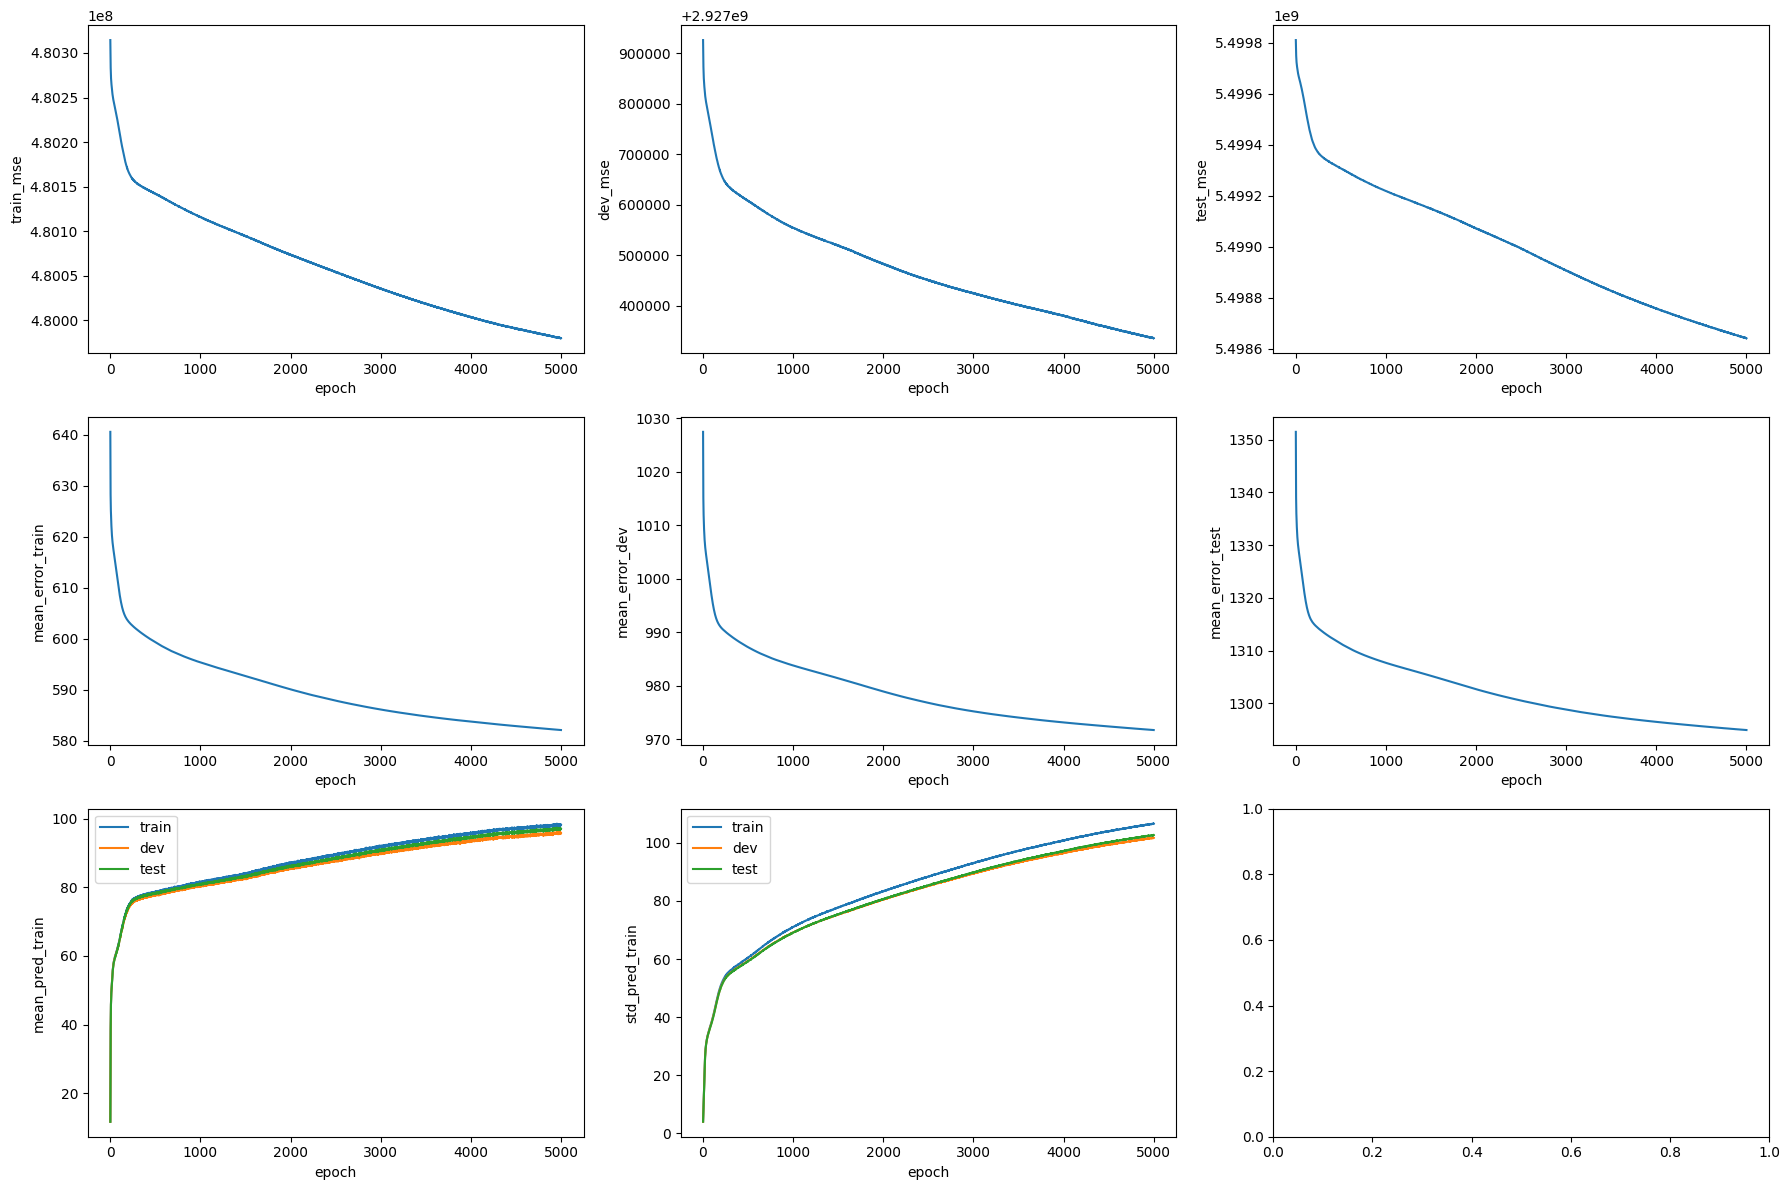

In [62]:

figure2, ax2 = plt.subplots(3, 3, figsize=(18, 12))

sns.lineplot(data=run, x="epoch", y="train_mse", ax=ax2[0, 0])
sns.lineplot(data=run, x="epoch", y="dev_mse", ax=ax2[0, 1])
sns.lineplot(data=run, x="epoch", y="test_mse", ax=ax2[0, 2])


sns.lineplot(data=run, x="epoch", y="mean_error_train", ax=ax2[1, 0])
sns.lineplot(data=run, x="epoch", y="mean_error_dev", ax=ax2[1, 1])
sns.lineplot(data=run, x="epoch", y="mean_error_test", ax=ax2[1, 2])

sns.lineplot(data=run, x="epoch", y="mean_pred_train", ax=ax2[2, 0], label="train")
sns.lineplot(data=run, x="epoch", y="mean_pred_dev", ax=ax2[2, 0], label="dev")
sns.lineplot(data=run, x="epoch", y="mean_pred_test", ax=ax2[2, 0], label="test")

sns.lineplot(data=run, x="epoch", y="std_pred_train", ax=ax2[2, 1], label="train")
sns.lineplot(data=run, x="epoch", y="std_pred_dev", ax=ax2[2, 1], label="dev")
sns.lineplot(data=run, x="epoch", y="std_pred_test", ax=ax2[2, 1], label="test")

figure2.tight_layout()

